In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Set plot style
sns.set(style="whitegrid")

# Base paths (update if needed)
DATA_RAW = Path("../data/raw")
TRAIN_PATH = DATA_RAW / "train.csv"
TEST_PATH = DATA_RAW / "test.csv"


In [7]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (65535, 76)
Test shape: (10000, 75)


,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [8]:
print("Train Info:")
train.info()

print("\nTest Info:")
test.info()


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           65535 non-null  object 
 1   ProductName                         65535 non-null  object 
 2   EngineVersion                       65535 non-null  object 
 3   AppVersion                          65535 non-null  object 
 4   SignatureVersion                    65535 non-null  object 
 5   IsBetaUser                          65535 non-null  int64  
 6   RealTimeProtectionState             65493 non-null  float64
 7   IsPassiveModeEnabled                65535 non-null  int64  
 8   AntivirusConfigID                   65490 non-null  float64
 9   NumAntivirusProductsInstalled       65490 non-null  float64
 10  NumAntivirusProductsEnabled         65490 non-null  float64
 11  HasTpm                       

In [9]:
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)

print("Missing values in train:")
display(missing_train)

print("\nMissing values in test:")
display(missing_test)


Missing values in train:


SMode                             636
CityID                            401
RegionIdentifier                  368
IsGamer                           368
InternalBatteryNumberOfCharges    340
                                 ... 
DeviceFamily                        0
ProductName                         0
HasOpticalDiskDrive                 0
PowerPlatformRole                   0
target                              0
Length: 76, dtype: int64


Missing values in test:


SMode                             92
RegionIdentifier                  62
IsGamer                           62
CityID                            61
InternalBatteryNumberOfCharges    54
                                  ..
CountryID                          0
PowerPlatformRole                  0
HasTpm                             0
NumericOSVersion                   0
MachineID                          0
Length: 75, dtype: int64

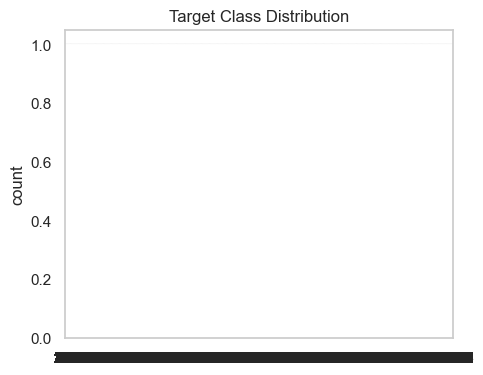

target
1    0.504967
0    0.495033
Name: proportion, dtype: float64


In [10]:
if "target" in train.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(train["target"])
    plt.title("Target Class Distribution")
    plt.show()

    print(train["target"].value_counts(normalize=True))
else:
    print("⚠️ No 'target' column found in dataset.")


In [11]:
TEXT_COL = "text"  # change if needed

train["text_len"] = train[TEXT_COL].astype(str).apply(len)
train["word_count"] = train[TEXT_COL].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(train["text_len"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()


KeyError: 'text'

In [12]:
if "target" in train.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=train["target"], y=train["word_count"])
    plt.title("Word Count by Target")
    plt.show()


KeyError: 'word_count'

<Figure size 800x500 with 0 Axes>

In [15]:
train.info()
train.isnull().mean().sort_values(ascending=False).head(20)


train['HasDetections'].value_counts(normalize=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           65535 non-null  object 
 1   ProductName                         65535 non-null  object 
 2   EngineVersion                       65535 non-null  object 
 3   AppVersion                          65535 non-null  object 
 4   SignatureVersion                    65535 non-null  object 
 5   IsBetaUser                          65535 non-null  int64  
 6   RealTimeProtectionState             65493 non-null  float64
 7   IsPassiveModeEnabled                65535 non-null  int64  
 8   AntivirusConfigID                   65490 non-null  float64
 9   NumAntivirusProductsInstalled       65490 non-null  float64
 10  NumAntivirusProductsEnabled         65490 non-null  float64
 11  HasTpm                              65535

KeyError: 'HasDetections'

In [18]:
# safe way to access target
if 'HasDetections' in train.columns:
    target_col = 'HasDetections'
elif 'target' in train.columns:
    target_col = 'target'
else:
    raise KeyError("No expected target column found")


train['target'].value_counts(), train['target'].value_counts(normalize=True)

(missing := train.isnull().mean().sort_values(ascending=False).head(40))
display(missing)

cat_cols = train.select_dtypes(include=['object']).columns
pd.Series({c: train[c].nunique() for c in cat_cols}).sort_values(ascending=False).head(50)



train['DateAS'] = pd.to_datetime(train['DateAS'], errors='coerce')
train['DateOS'] = pd.to_datetime(train['DateOS'], errors='coerce')
train['AS_year'] = train['DateAS'].dt.year
train['AS_month'] = train['DateAS'].dt.month
train['OS_year'] = train['DateOS'].dt.year
train['OS_month'] = train['DateOS'].dt.month
# age of OS in days vs AS (example)
train['days_between_AS_OS'] = (train['DateAS'] - train['DateOS']).dt.days


SMode                                 0.009705
CityID                                0.006119
RegionIdentifier                      0.005615
IsGamer                               0.005615
InternalBatteryNumberOfCharges        0.005188
FirmwareManufacturerID                0.004028
FirmwareVersionID                     0.003555
IsFlightsDisabled                     0.003403
OEMModelID                            0.002411
OEMNameID                             0.002274
FirewallEnabled                       0.001831
TotalPhysicalRAMMB                    0.001541
IsAlwaysOnAlwaysConnectedCapable      0.001373
SystemVolumeCapacityMB                0.001175
PrimaryDiskCapacityMB                 0.001175
IEVersionID                           0.001144
OSInstallLanguageID                   0.001099
ProcessorModelID                      0.000946
ProcessorManufacturerID               0.000946
ProcessorCoreCount                    0.000946
PrimaryDisplayDiagonalInches          0.000702
PrimaryDispla

In [19]:
cat_cols = train.select_dtypes(include=['object']).columns
cat_unique = train[cat_cols].nunique().sort_values(ascending=False)
cat_unique


MachineID                   65475
SignatureVersion             2433
OSBuildLab                    260
NumericOSVersion              216
AppVersion                     69
EngineVersion                  36
ChassisType                    26
OSEdition                      18
OSSkuFriendlyName              16
OSBranch                       13
MDC2FormFactor                 11
PowerPlatformRole               9
OSInstallType                   9
OsPlatformSubRelease            9
SKUEditionName                  8
FlightRing                      7
OSVersion                       7
AutoUpdateOptionsName           6
LicenseActivationChannel        6
PlatformType                    4
OSGenuineState                  4
PrimaryDiskType                 4
OSArchitecture                  3
Processor                       3
ProductName                     2
DeviceFamily                    2
dtype: int64

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

fi = pd.read_csv("outputs/metrics/feature_importances.csv")
top = fi.groupby("feature")["importance"].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(8,6))
top[::-1].plot.barh()
plt.title("Top 30 Feature Importances (avg over folds)")
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/metrics/feature_importances.csv'